In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-implicit-ab4)

We study the convergence of AB4 using the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. As usual, a built-in solver is called to give an accurate reference solution.

In [2]:
ivp = ode;
ivp.ODEFcn = @(t, u, p) sin((t + u)^2);
ivp.InitialValue = -1;
a = 0;  b = 4;
ivp.AbsoluteTolerance = 1e-13;
ivp.RelativeTolerance = 1e-13;
u_ref = solutionFcn(ivp, a, b);

Now we perform a convergence study of the AB4 code.

In [3]:
n = round(4 * 10.^(0:0.5:3)');
err = zeros(size(n));
for i = 1:length(n)
    [t, u] = ab4(ivp, a, b, n(i));
    err(i) = norm(u_ref(t) - u, Inf);
end
disp(table(n, err, variableNames=["n", "inf-norm error"]))

     n      inf-norm error
    ____    ______________

       4         0.50044  
      13          1.3913  
      40       0.0062781  
     126      9.9494e-05  
     400       1.096e-06  
    1265      1.1276e-08  
    4000      1.1331e-10  



The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors.

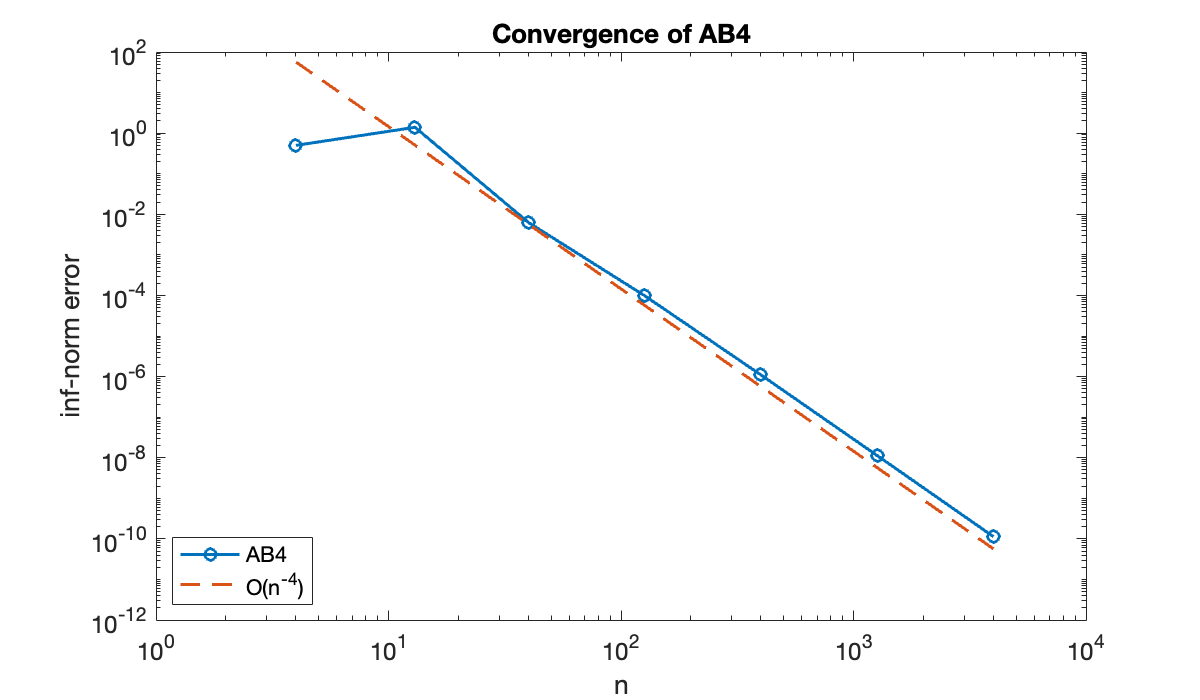

In [4]:
clf, loglog(n, err, '-o')
hold on
loglog(n, 0.5 * err(end) * (n / n(end)) .^ (-4), '--')
xlabel("n");  ylabel("inf-norm error")
title("Convergence of AB4")
legend("AB4", "O(n^{-4})", location="southwest");